In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import warnings
import re
import string

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\Misc\\Programming\\Machine & Deep Learning\\Deep Learning\\Sample Data\\Twitter_Sentiments.csv")
data.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

## Preprocessing Dataset

In [6]:
def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for word in r:
        text = re.sub(word, "", text)
    return text
# remove twitter handles
data["clean_tweets"] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
data.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                        clean_tweets  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [7]:
# remove special chareacters 

data.clean_tweets = data.clean_tweets.str.replace("[^a-zA-Z#]", " ")
data.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                        clean_tweets  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can t use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide  society now    #motivation

In [10]:
#remove short words

data.clean_tweets = data.clean_tweets.apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
data.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                        clean_tweets  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take with time  
4                     factsguide society #motivation

In [11]:
# Tokenization
tokenized = data.clean_tweets.apply(lambda x: x.split())
tokenized

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwaves, trying, wrap, herself...
31959            [listening, songs, monday, morning, work]
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                                      [thank, follow]
Name: clean_tweets, Length: 31962, dtype: object

In [15]:
# Stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
tokenized = tokenized.apply(lambda x: [ps.stem(w) for w in x])
tokenized

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwav, tri, wrap, herself, man...
31959                   [listen, song, monday, morn, work]
31960    [#sikh, #templ, vandalis, #calgari, #wso, cond...
31961                                      [thank, follow]
Name: clean_tweets, Length: 31962, dtype: object

In [16]:
# joining stemmed words
for i in range(len(tokenized)):
    tokenized[i] = " ".join(tokenized[i])
tokenized

0        when father dysfunct selfish drag kid into dys...
1        thank #lyft credit caus they offer wheelchair ...
2                                      bihday your majesti
3                               #model love take with time
4                                 factsguid societi #motiv
                               ...                        
31957                                           that youuu
31958    nina turner airwav tri wrap herself mantl genu...
31959                         listen song monday morn work
31960          #sikh #templ vandalis #calgari #wso condemn
31961                                         thank follow
Name: clean_tweets, Length: 31962, dtype: object

In [17]:
data.clean_tweets = tokenized
data.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                        clean_tweets  
0  when father dysfunct selfish drag kid into dys...  
1  thank #lyft credit caus they offer wheelchair ...  
2                                bihday your majesti  
3                         #model love take with time  
4                           factsguid societi #motiv

## Explotary Data Analysis (EDA)

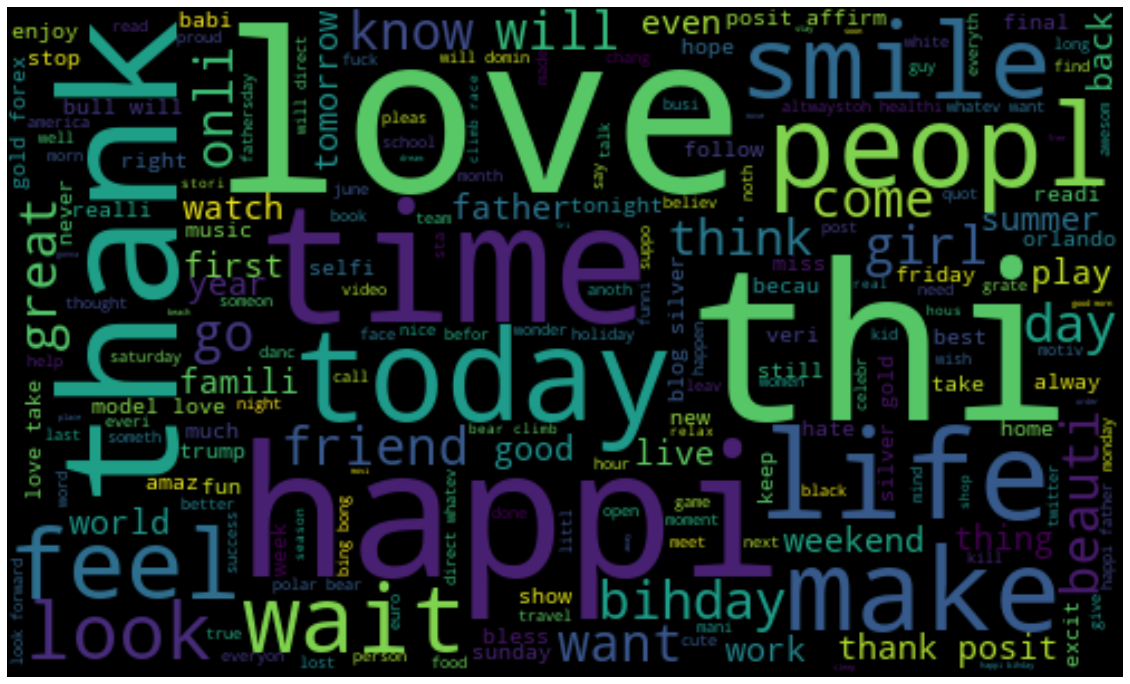

In [23]:
# Visualize frequent words
from wordcloud import WordCloud
allwords = " ".join(sent for sent in data.clean_tweets)

wordcloud = WordCloud(width = 500, height = 300, random_state = 42, max_font_size = 100).generate(allwords)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

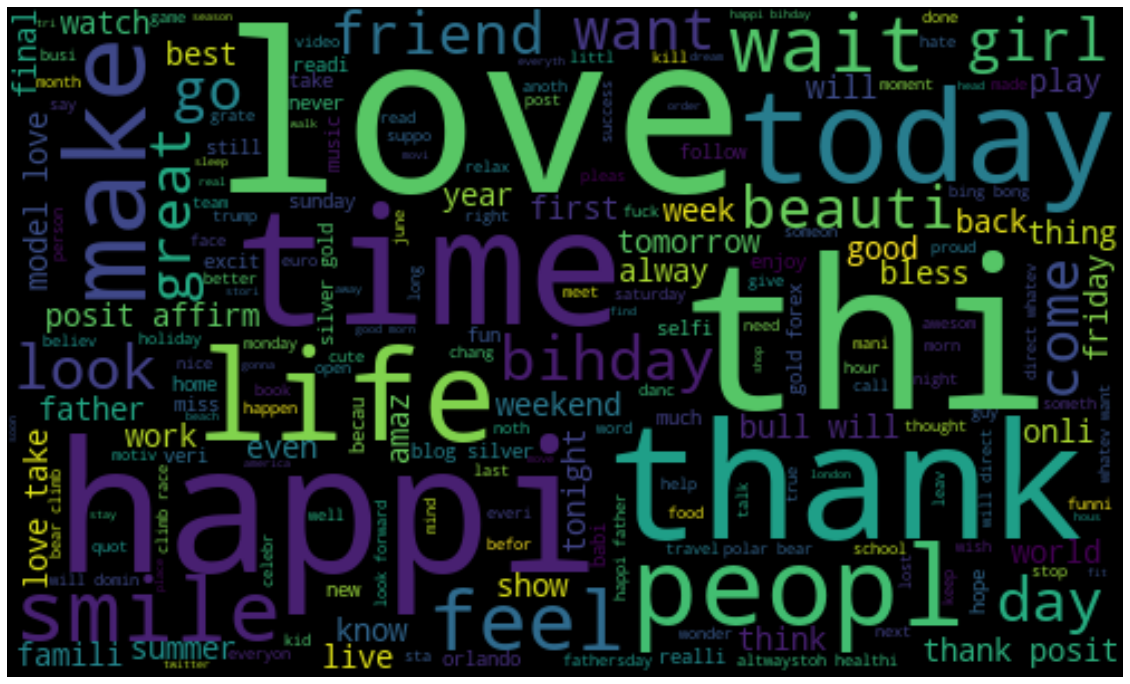

In [24]:
# Visualize frequent positive words

allwords = " ".join(sent for sent in data.clean_tweets[data.label == 0])

wordcloud = WordCloud(width = 500, height = 300, random_state = 42, max_font_size = 100).generate(allwords)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

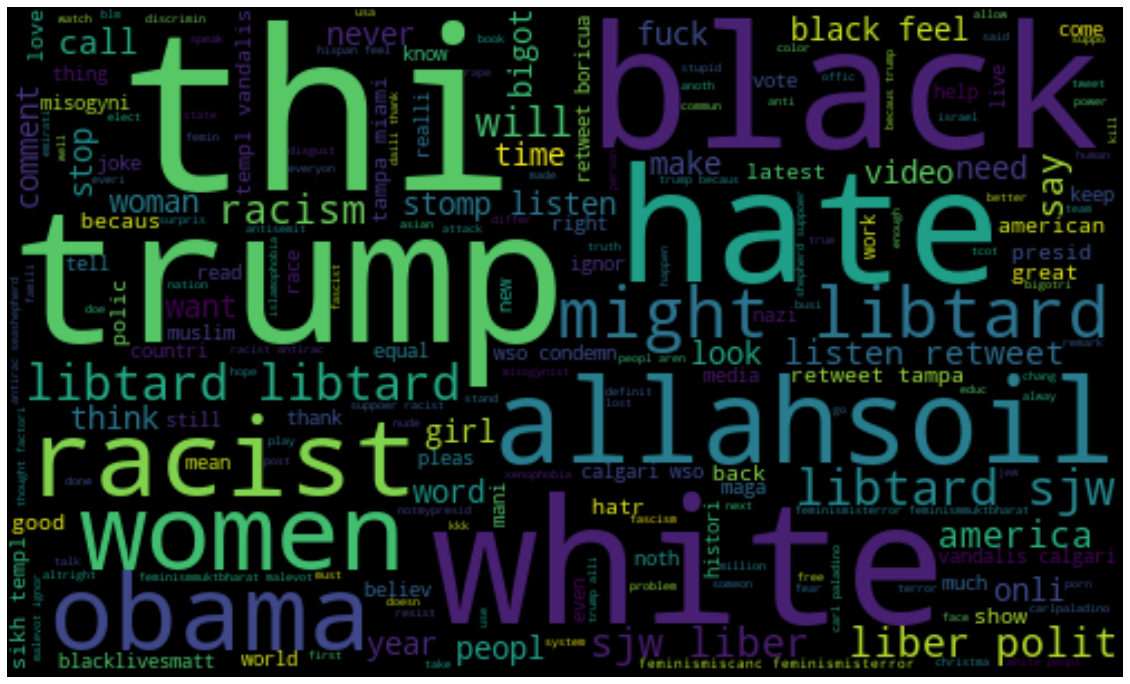

In [26]:
# Visualize frequent negative words

allwords = " ".join(sent for sent in data.clean_tweets[data.label== 1])

wordcloud = WordCloud(width = 500, height = 300, random_state = 42, max_font_size = 100).generate(allwords)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [28]:
# Extract hashtags

def hashtag_extract(data):
    hashtags = []
    for sent in data:
        ht = re.findall(r"#(\w+)", sent)
        hashtags.append(ht)
    return hashtags

ht_pos = hashtag_extract(data.clean_tweets[data.label == 0])
ht_neg = hashtag_extract(data.clean_tweets[data.label == 1])

ht_pos = sum(ht_pos, [])
ht_neg = sum(ht_neg, [])

In [32]:
freq = nltk.FreqDist(ht_pos)
df_pos = pd.DataFrame({'Hashtag': list(freq.keys()),
                      'Count': list(freq.values())})
df_pos

Hashtag  Count
0                 run     72
1                lyft      2
2           disapoint      1
3            getthank      2
4               model    375
...               ...    ...
19490            kamp      1
19491            ucsd      1
19492  berlincitygirl      1
19493            genf      1
19494            bern      1

[19495 rows x 2 columns]

In [33]:
freq = nltk.FreqDist(ht_neg)
df_neg = pd.DataFrame({'Hashtag': list(freq.keys()),
                      'Count': list(freq.values())})
df_neg.head(5)

Hashtag  Count
0           cnn     10
1      michigan      2
2          tcot     14
3     australia      6
4  opkillingbay      5

## Splitting the data

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_df=0.90, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vec.fit_transform(data.clean_tweets)

In [36]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [37]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(bow, data.label, test_size = 0.25, random_state = 42)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [42]:
ypred = model.predict(xtest)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

acc = accuracy_score(ytest,ypred)
acc

0.9469403078463271

In [44]:
f1_score(ytest,ypred)

0.49763033175355453

In [45]:
yprob = model.predict_proba(xtest)
yprob = yprob[:,1] >= 0.3
yprob = yprob.astype(np.int)

In [46]:
accuracy_score(ytest, yprob)

0.9433112251282693

In [47]:
f1_score(ytest,yprob)

0.5545722713864307